In [25]:
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import networkx as nx
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.utils import to_networkx


In [26]:
dataset_name = "CiteSeer"
dataset = Planetoid(root='/tmp/Planetoid', name=dataset_name, transform=NormalizeFeatures())
data = dataset[0]  # Get the first graph object.

In [16]:
objects = []
with (open("/Users/yani/Documents/GitHub/FML-GNN_DisagreementProblem/GNNModels/Saved_Explanations/Explanations_GCN_CiteSeer_2022-11-26T20:05:16-95.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [17]:
node_indices = objects[0]['node_indices']

In [18]:
imp_nodes_ig=objects[0]['ig']
imp_nodes_gnn=objects[0]['gnn']
imp_nodes_cam=objects[0]['cam']
imp_nodes_pge=objects[0]['pge']
imp_nodes_pgm=objects[0]['pgm']
# imp_nodes_gcam=objects[0]['gcam']


In [19]:

def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection

    if union == 0:
        return float(1)
        
    return float(intersection) / union

In [20]:
n_methods = 5

jacard = np.zeros((n_methods, n_methods))

count = 0
for k in node_indices:

    count += 1

    jacard[0, 1] += jaccard(imp_nodes_ig[k], imp_nodes_gnn[k])
    jacard[0, 2] += jaccard(imp_nodes_ig[k], imp_nodes_pge[k])
    jacard[0, 3] += jaccard(imp_nodes_ig[k], imp_nodes_cam[k])
    jacard[0, 4] += jaccard(imp_nodes_ig[k], imp_nodes_pgm[k])

    jacard[1, 2] += jaccard(imp_nodes_gnn[k], imp_nodes_pge[k])
    jacard[1, 3] += jaccard(imp_nodes_gnn[k], imp_nodes_cam[k])
    jacard[1, 4] += jaccard(imp_nodes_gnn[k], imp_nodes_pgm[k])


    jacard[2, 3] += jaccard(imp_nodes_pge[k], imp_nodes_cam[k])
    jacard[2, 4] += jaccard(imp_nodes_pge[k], imp_nodes_pgm[k])

    jacard[3, 4] += jaccard(imp_nodes_cam[k], imp_nodes_pgm[k])



jacard = (jacard + jacard.T)/(count)

for i in range(n_methods):

    jacard[i,i] = 1

<AxesSubplot: >

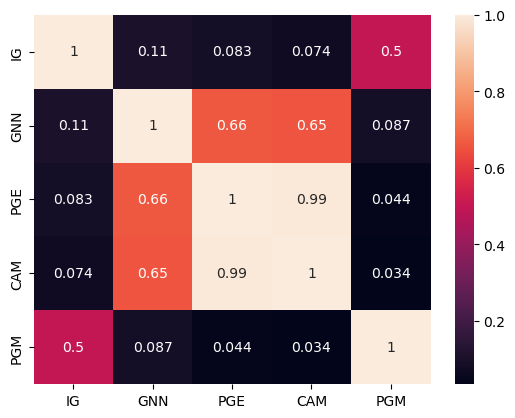

In [24]:
labels = ["IG", "GNN", "PGE", "CAM", "PGM"]
jacard_df = pd.DataFrame(jacard, index = labels, columns = labels)
sns.heatmap(jacard_df, annot=True)

In [50]:
G = to_networkx(data)
hubs = nx.hits(G)[0]
authorities = nx.hits(G)[1]

hubs_imp_nodes_ig = []
authorities_imp_nodes_ig = []
hubs_imp_nodes_gnn = []
authorities_imp_nodes_gnn = []
hubs_imp_nodes_pge = []
authorities_imp_nodes_pge = []
hubs_imp_nodes_cam = []
authorities_imp_nodes_cam = []
hubs_imp_nodes_pgm = []
authorities_imp_nodes_pgm = []

for node_idx in imp_nodes_ig:

    imp_node_ig = imp_nodes_ig[node_idx]
    hubs_imp_nodes_ig.append([hubs[x] for x in imp_node_ig])
    authorities_imp_nodes_ig.append([authorities[x] for x in imp_node_ig])

    imp_node_gnn = imp_nodes_gnn[node_idx]
    hubs_imp_nodes_gnn.append([hubs[x] for x in imp_node_gnn])
    authorities_imp_nodes_gnn.append([authorities[x] for x in imp_node_gnn])

    imp_node_pge = imp_nodes_pge[node_idx]
    hubs_imp_nodes_pge.append([hubs[x] for x in imp_node_pge])
    authorities_imp_nodes_pge.append([authorities[x] for x in imp_node_pge])

    imp_node_cam = imp_nodes_cam[node_idx]
    hubs_imp_nodes_cam.append([hubs[x] for x in imp_node_cam])
    authorities_imp_nodes_cam.append([authorities[x] for x in imp_node_cam])

    imp_node_pgm = imp_nodes_pgm[node_idx]
    hubs_imp_nodes_pgm.append([hubs[x] for x in imp_node_pgm])
    authorities_imp_nodes_pgm.append([authorities[x] for x in imp_node_pgm])
    

/opt/homebrew/anaconda3/envs/DIG_GXAI/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [51]:
n_methods = 5

jacard = np.zeros((n_methods, n_methods))

count = 0
for k in range(0, len(hubs_imp_nodes_pge)):

    count += 1

    jacard[0, 1] += jaccard(hubs_imp_nodes_ig[k], hubs_imp_nodes_gnn[k])
    jacard[0, 2] += jaccard(hubs_imp_nodes_ig[k], hubs_imp_nodes_pge[k])
    jacard[0, 3] += jaccard(hubs_imp_nodes_ig[k], hubs_imp_nodes_cam[k])
    jacard[0, 4] += jaccard(hubs_imp_nodes_ig[k], hubs_imp_nodes_pgm[k])

    jacard[1, 2] += jaccard(hubs_imp_nodes_gnn[k], hubs_imp_nodes_pge[k])
    jacard[1, 3] += jaccard(hubs_imp_nodes_gnn[k], hubs_imp_nodes_cam[k])
    jacard[1, 4] += jaccard(hubs_imp_nodes_gnn[k], hubs_imp_nodes_pgm[k])


    jacard[2, 3] += jaccard(hubs_imp_nodes_pge[k], hubs_imp_nodes_cam[k])
    jacard[2, 4] += jaccard(hubs_imp_nodes_pge[k], hubs_imp_nodes_pgm[k])

    jacard[3, 4] += jaccard(hubs_imp_nodes_cam[k], hubs_imp_nodes_pgm[k])



jacard = (jacard + jacard.T)/(count)

for i in range(n_methods):

    jacard[i,i] = 1

<AxesSubplot: >

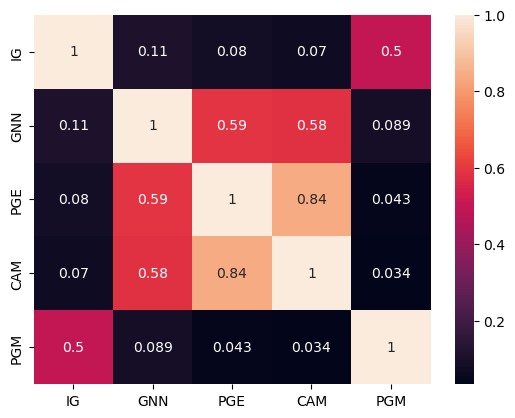

In [52]:
labels = ["IG", "GNN", "PGE", "CAM", "PGM"]
jacard_df = pd.DataFrame(jacard, index = labels, columns = labels)
sns.heatmap(jacard_df, annot=True)

In [53]:
n_methods = 5

jacard = np.zeros((n_methods, n_methods))

count = 0
for k in range(0, len(hubs_imp_nodes_pge)):

    count += 1

    jacard[0, 1] += jaccard(authorities_imp_nodes_ig[k], authorities_imp_nodes_gnn[k])
    jacard[0, 2] += jaccard(authorities_imp_nodes_ig[k], authorities_imp_nodes_pge[k])
    jacard[0, 3] += jaccard(authorities_imp_nodes_ig[k], authorities_imp_nodes_cam[k])
    jacard[0, 4] += jaccard(authorities_imp_nodes_ig[k], authorities_imp_nodes_pgm[k])

    jacard[1, 2] += jaccard(authorities_imp_nodes_gnn[k], authorities_imp_nodes_pge[k])
    jacard[1, 3] += jaccard(authorities_imp_nodes_gnn[k], authorities_imp_nodes_cam[k])
    jacard[1, 4] += jaccard(authorities_imp_nodes_gnn[k], authorities_imp_nodes_pgm[k])


    jacard[2, 3] += jaccard(authorities_imp_nodes_pge[k], authorities_imp_nodes_cam[k])
    jacard[2, 4] += jaccard(authorities_imp_nodes_pge[k], authorities_imp_nodes_pgm[k])

    jacard[3, 4] += jaccard(authorities_imp_nodes_cam[k], authorities_imp_nodes_pgm[k])



jacard = (jacard + jacard.T)/(count)

for i in range(n_methods):

    jacard[i,i] = 1

<AxesSubplot: >

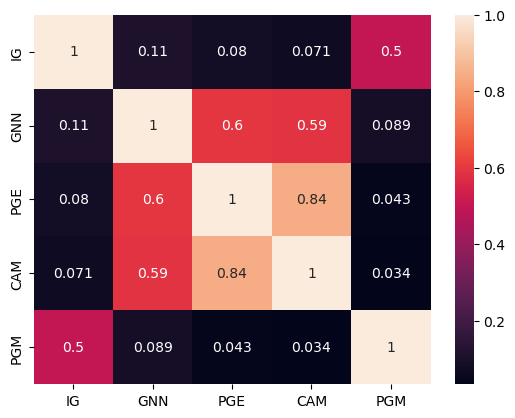

In [54]:
labels = ["IG", "GNN", "PGE", "CAM", "PGM"]
jacard_df = pd.DataFrame(jacard, index = labels, columns = labels)
sns.heatmap(jacard_df, annot=True)